In [86]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

from plotnine import ggplot, aes, geom_point, labs

In [50]:
ames = pd.read_csv(r"C:\Users\tuke-\Desktop\1_GSB544_Computing_and_Machine_Learning\Week_7\data\AmesHousing.csv")

# Get rid of columns with mostly NaN values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

# Drop other NAs
ames = ames.dropna()

In [51]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]

X_test, X_train, y_test, y_train = train_test_split(X,y)

In [52]:

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(alpha=1))]
)

In [53]:

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

In [124]:
lr_fitted = lr_pipeline.fit(X_train, y_train)
ridge_fitted = ridge_pipeline.fit(X_train, y_train)

lr_coef = lr_fitted['linear_regression'].coef_
ridge_coef = ridge_fitted['ridge_regression'].coef_

df = pd.DataFrame({'coefficient':list(range(1,237)),'LR':lr_coef, 'RR':ridge_coef})

scaler = StandardScaler()
df[['LR','RR']] = scaler.fit_transform(df[['LR', 'RR']])

scores = cross_val_score(lr_pipeline, X, y, cv=5, scoring='r2')
R2_lr = scores.mean()

scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='r2')
R2_ridge = scores.mean()

print(R2_lr)
print(R2_ridge)

-5.7430827545921724e+19
0.8611593144036664


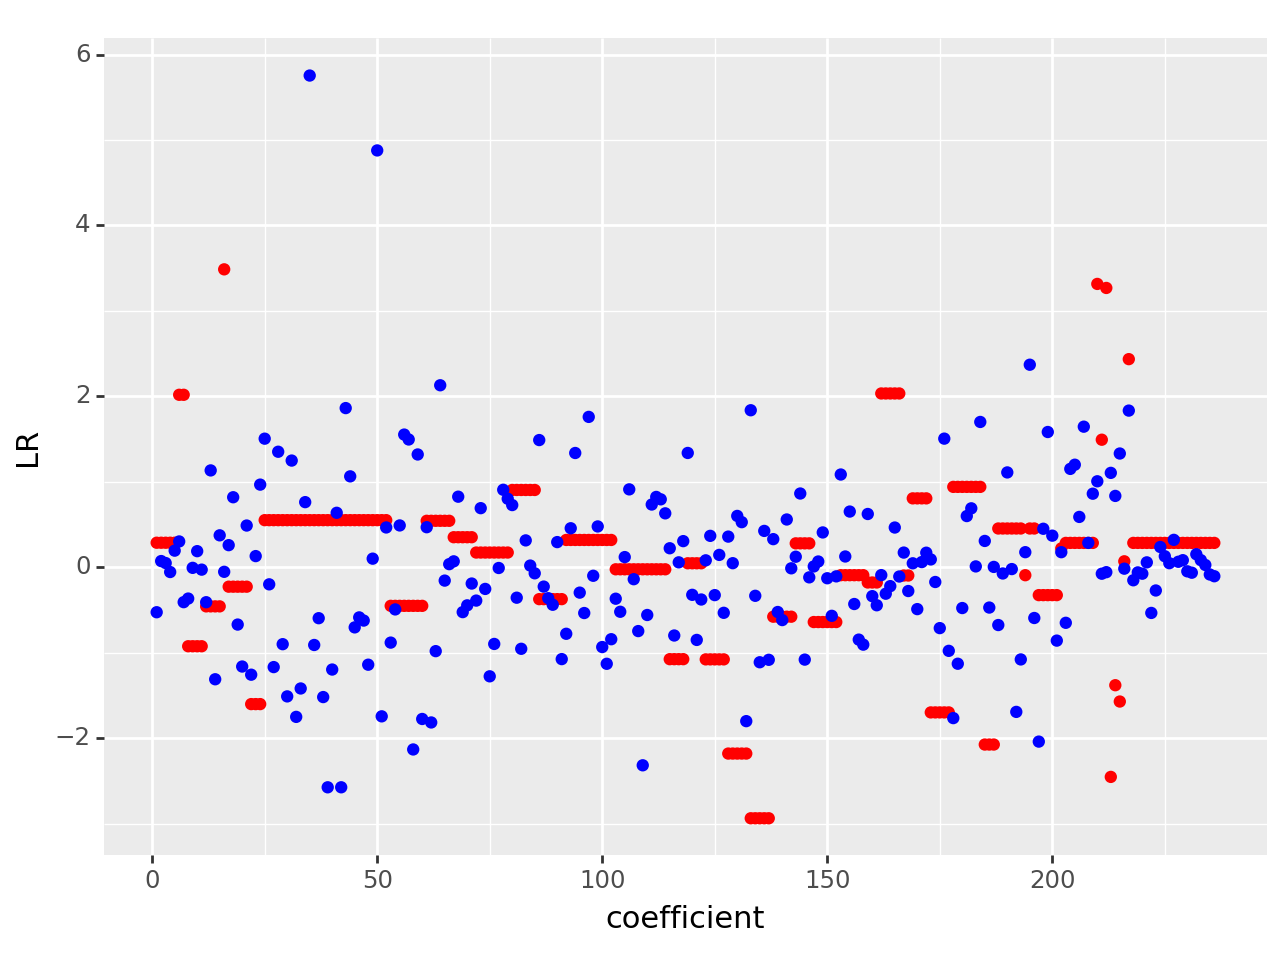

<Figure Size: (640 x 480)>

In [80]:
(ggplot(df)
    + geom_point(aes(x = "coefficient", y = "LR"), color = 'red')
    + geom_point(aes(x = "coefficient", y = "RR"), color = 'blue'))

In [35]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(alpha=0.001))]
)

scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='r2')
R2_ridge001 = scores.mean()

In [36]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(alpha=0.01))]
)

scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='r2')
R2_ridge01 = scores.mean()

In [37]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(alpha=0.1))]
)

scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='r2')
R2_ridge1 = scores.mean()

In [38]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(alpha=10))]
)

scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='r2')
R2_ridge10 = scores.mean()

In [39]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

ridge_pipeline = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(alpha=100))]
)

scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='r2')
R2_ridge100 = scores.mean()

In [40]:
print(R2_ridge001)
print(R2_ridge01)
print(R2_ridge1)
print(R2_ridge)
print(R2_ridge10)
print(R2_ridge100)

0.8529454580764183
0.8532236194833451
0.8554231896664213
0.8611593144036664
0.8633548524419268
0.8571291093859319


Although all the values are very close, it seems that the model with an alpha of 10 gives us the most appropriate model.

In [88]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso(alpha=0.001))]
)

scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='r2')
R2_lasso001 = scores.mean()

In [89]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso(alpha=0.01))]
)

scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='r2')
R2_lasso01 = scores.mean()

In [90]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso(alpha=0.1))]
)

scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='r2')
R2_lasso1 = scores.mean()

In [91]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso(alpha=1))]
)

scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='r2')
R2_lasso = scores.mean()

In [92]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso(alpha=10))]
)

scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='r2')
R2_lasso10 = scores.mean()

In [94]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso(alpha=100))]
)

scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='r2')
R2_lasso100 = scores.mean()

In [97]:
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lasso_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso(alpha=1000))]
)

scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='r2')
R2_lasso1000 = scores.mean()

In [98]:
print(R2_lasso001)
print(R2_lasso01)
print(R2_lasso1)
print(R2_lasso)
print(R2_lasso10)
print(R2_lasso100)
print(R2_lasso1000)

0.8544397995269115
0.854549158954238
0.8553942923313158
0.855890065025586
0.8594950842585085
0.866170225869277
0.839605512352312


Comparing the different lasso results, the trend indicated that alpha of a 100 and a 1000 would need to be tested and in this case the model with an alpha of 100 indicated the best result, although the function was giving error messages that had to do with some of the functions parameters. in comparison this method gives slightly higher r2 scores at 0.866170225869277 vs. 0.8633548524419268 than the ridge method.

In [123]:
# I just used this same function to test through.

ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

elastic_pipeline = Pipeline(
  [("preprocessing", ct),
  ("elastic_regression", ElasticNet(alpha=0.01, l1_ratio = 0.0001))]
)

scores = cross_val_score(elastic_pipeline, X, y, cv=5, scoring='r2')
R2_elastic = scores.mean()

print(R2_elastic)

0.8627439543775299


In [125]:
elastic_fitted = elastic_pipeline.fit(X_train, y_train)

lr_coef = lr_fitted['linear_regression'].coef_
ridge_coef = ridge_fitted['ridge_regression'].coef_
elastic_coef = elastic_fitted['elastic_regression'].coef_

df = pd.DataFrame({'coefficient':list(range(1,237)),'LR':lr_coef, 'RR':ridge_coef, "ER":elastic_coef})

scaler = StandardScaler()
df[['LR','RR','ER']] = scaler.fit_transform(df[['LR', 'RR', 'ER']])

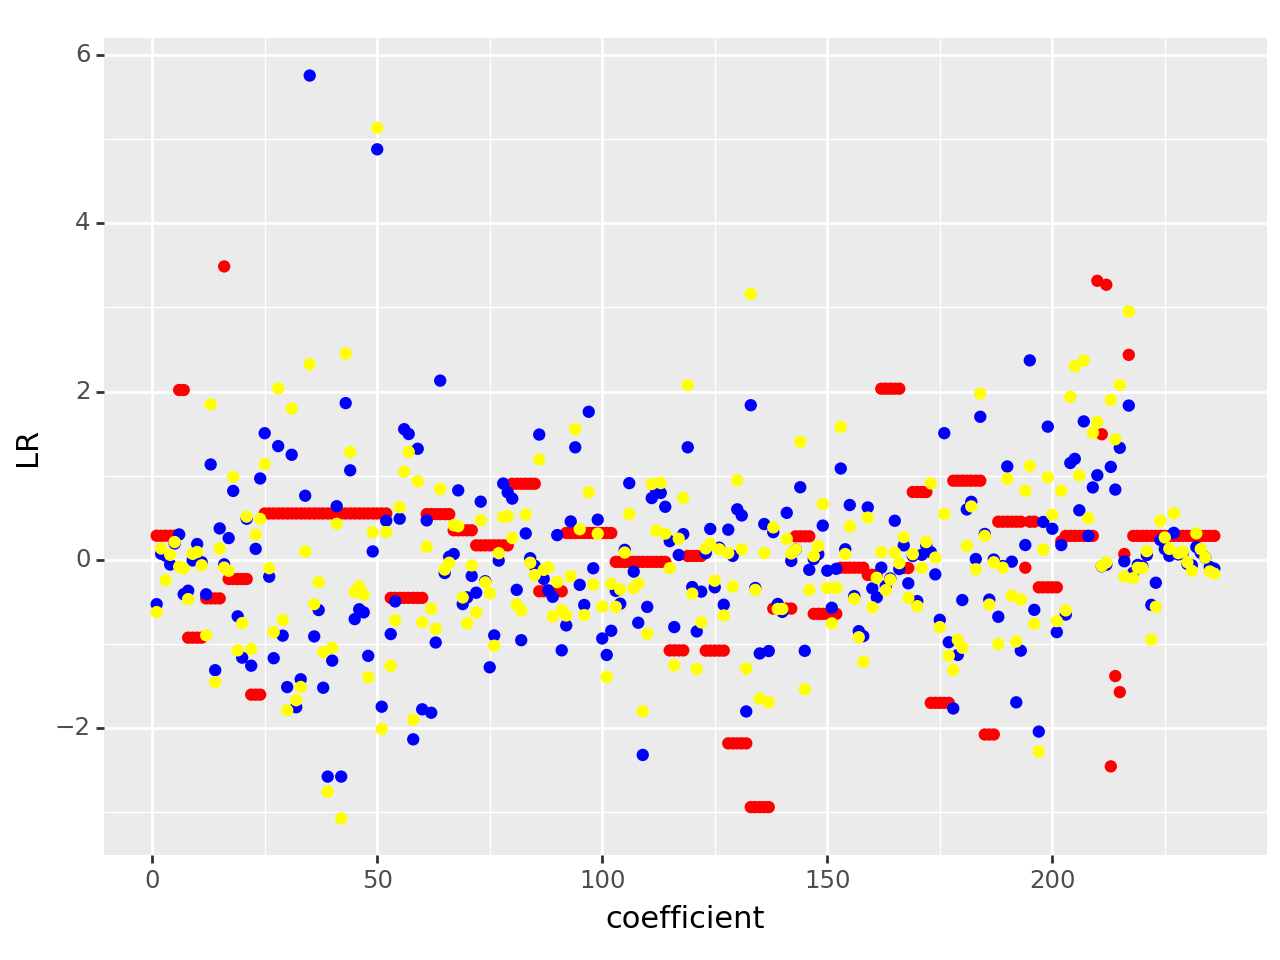

<Figure Size: (640 x 480)>

In [127]:
(ggplot(df)
    + geom_point(aes(x = "coefficient", y = "LR"), color = 'red')
    + geom_point(aes(x = "coefficient", y = "RR"), color = 'blue')
    + geom_point(aes(x = "coefficient", y = "ER"), color = 'yellow'))

comparing the coefficients, it seems that linear regression gives us the most consistent coefficients, however, if we go and look at the R2 values it indicates that the model is actually overfitting , whereas, the ridge and elastic methods look very similar with a seemingly randomized scatter pattern. It would be difficult to draw ant coclusions between the two from this graph alone. It seems to make sense that different coefficients would have different values as people would value different features of a house differently. the linear model has many coefficients with the same value, which would indicate that they have the same effect even though they likely wouldn't.